<div class="alert alert-block alert-info"><b>IAB303</b> - Data Analytics for Business Insight</div>

## LAB SESSION :: Wrangling external business data

1. Load text, infer structure
2. Basic pattern matching
3. Basic visualisation

## Load text, infer structure

1. Load the contents of the file called `kaggle-amazon_reviews-first50.txt` into a variable called `rawtext` and then display the contents of the variable.
2. How do we make this unstructured text fit a structure that we can use? How do we separate the reviews?
3. Can we use split further to structure each review?

In [1]:
#Open the file and read it into a variable 'text'
file = open("data/kaggle-amazon_reviews-first50.txt")
rawtext = file.read()
file.close()
rawtext

'__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"\n__label__2 One of the best game music soundtracks - for a game I didn\'t really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there\'s not too many

In [2]:
#Split the document by newlines to give us individual reviews
reviews = rawtext.split("\n")
if reviews[-1]=='':
    del reviews[-1] #Remove last empty item
reviews

['__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"',
 "__label__2 One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too ma

Use a function to convert the plain text list into `HTML` that we can then display to make the reviews easier to read. The function will take each element of the list and wrap them in paragraph `p` tags, join the paragraphs together and return the result as `HTML`.

In [4]:
#Import some display software
from IPython.core.display import display, HTML

#FUNCTION - turn list into HTML
def listToHtml(textList):
    def pTag(text): #function that wraps text in paragraph tags
        return "<p>"+text+"</p>"
    paras = map(pTag,textList) #Apply the wrapping function to the list
    return HTML(''.join(paras)) #Join the paragraphs together and return as HTML

#Create the HTML by calling the function
reviewsAsHtml = listToHtml(reviews)

#Display the HTML
display(reviewsAsHtml)

In [5]:
#For each review, we can split further - try with first review
firstReview = reviews[0]
firstReview

'__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"'

In [6]:
firstReviewParts = firstReview.split(":")
print("Label, subject >>> ",firstReviewParts[0])
print("Review text    >>> ",firstReviewParts[1])

Label, subject >>>  __label__2 Great CD
Review text    >>>   My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"


## Basic pattern matching

In splitting the text we were actually applying a simple pattern matching algorithm that turned the text into a list based on matching a chosen character e.g. `\n`. However, we can manipulate text further by using *regular expressions* or *regex*.

1. Use regex to identify the label and return `positive` or `negative` (hint: `?<=`) [Python Regex](https://docs.python.org/3/library/re.html). Experiment [here](https://pythex.org)
2. Use a namedtuple to hold label, subject and text
3. Process the list of unstructured reviews into structured form

In [15]:
#Import the Regex library
import re

#Create an expression to pull out the label value
match = re.search(r"(?<=__label__)[0-9]+",firstReviewParts[0])
match

<_sre.SRE_Match object; span=(9, 10), match='2'>

In [16]:
#Get the first regex match group
match.group(0)

'2'

In [17]:
#We can split using the same regex
split = re.split(r"(?<=__label__)[0-9]+",firstReviewParts[0])
split

['__label__', ' Great CD']

In [18]:
#The second part gives us the subject, but we need to clean it up
subject = split[1].strip()
subject

'Great CD'

Functions enable us to easily repeat a block of code. If we write functions to get the sentiment and the subject of the review, these can be used repeatedly on each of the reviews in our list.

In [19]:
#Create a function to extract the number value as a positive or negative label

def getSentimentLabel(text):
    match = re.search(r"(?<=__label__)[0-9]+",text)
    value = match.group(0)
    if value=='1':
        return 'negative'
    elif value=='2':
        return 'positive'
    
#Test with first review

getSentimentLabel(firstReviewParts[0])

'positive'

In [20]:
#Create a function to extract the subject

def getSubject(text):
    split = re.split(r"(?<=__label__)[0-9]+",text)
    return split[1].strip()

#Test with first review

getSubject(firstReviewParts[0])

'Great CD'

In [21]:
#Setup a review namedtuple
from collections import namedtuple
Review = namedtuple('review',['label','subject','text'])

In [23]:
#Create dummy Review to test
rev = Review('myLabel','mySubect','myText')
rev.label

'myLabel'

In [24]:
# Create a function to parse a review into a tuple

def parseReview(text):
    textSplit = text.split(':')
    text = textSplit[1]  
    subject = getSubject(textSplit[0])
    label = getSentimentLabel(textSplit[0])
    return Review(label,subject,text)

In [25]:
# Test the review function

parseReview(firstReview)

review(label='positive', subject='Great CD', text=' My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"')

In [26]:
# Process all reviews with the parseReview function

structuredReviews = list(map(parseReview,reviews))
structuredReviews

[review(label='positive', subject='Great CD', text=' My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"'),
 review(label='positive', subject="One of the best game music soundtracks - for a game I didn't really play", text=" Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad 

## Basic visualisation

Create 2 visualisations from the semi-structured data:

1. Print out the reviews with subject in `bold` and coloured according to sentiment label. Print the text normally.
2. Display a graph of the total positive and negative labels.

In [29]:
#Modify the listToHtml function from before
def reviewsToHtml(reviewList):
    def pTag(review): #function that wraps review in tags
        return '<p><span class="'+review.label+'">'+review.subject+"</span>: "+review.text+"</p>"
    paras = map(pTag,reviewList) #Apply the wrapping function to the list
    return HTML(''.join(paras)) #Join the paragraphs together and return as HTML



In [30]:
#Create the HTML by calling the function
structReviewsHtml = reviewsToHtml(structuredReviews)
structReviewsHtml

We now have better structure, but we are still lacking the colour to descriminate between the positive and negative reviews.

In [32]:
#Create the CSS for the positive and negative labels
css = HTML("""
<style>
.positive {
    color: green;
}
.negative {
    color: red;
}
</style>
""")

#Display the HTML
display(css,structReviewsHtml)

Before creating the chart, we need to get a count of the positive reviews and the negative reviews. We can do this by getting a list of each type (which could be useful separate datasets) and counting how many are in each list.

In [33]:
#Count the positives and negatives
posList = list(filter(lambda review: review.label=='positive', structuredReviews))
negList = list(filter(lambda review: review.label=='negative', structuredReviews))
posCount = len(posList)
negCount = len(negList)
print("Number of positive reviews: ",posCount)
print("Number of negative reviews: ",negCount)

Number of positive reviews:  28
Number of negative reviews:  22


Text(0.5,1,'Amazon Reviews Sentiment Mix')

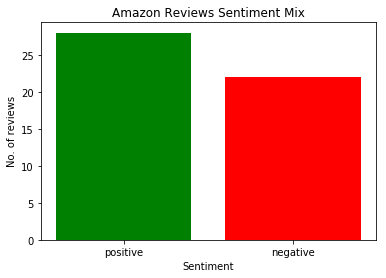

In [35]:
#Import the plotting library
import matplotlib.pyplot as plt

#Setup the data
y = [posCount,negCount]
x = ['positive','negative']
colours = ['green','red']
#Plot the data
plt.bar(x,y, color=colours)

#Lable the chart
plt.ylabel('No. of reviews')
plt.xlabel('Sentiment')
plt.title('Amazon Reviews Sentiment Mix')